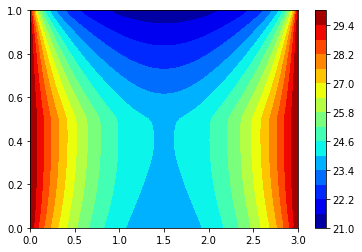

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import vtk
from vtk.util import numpy_support
%matplotlib inline
#ファイル読み込み
filename = "heat_result.vtk"
reader = vtk.vtkUnstructuredGridReader()
reader.SetFileName(filename)
reader.Update()

#cell data から point data変換
cell2point = vtk.vtkCellDataToPointData()
cell2point.SetInputData(reader.GetOutput())
cell2point.Update()

#座標と温度データのnumpy化
coord = numpy_support.vtk_to_numpy(cell2point.GetOutput().GetPoints().GetData())
x = coord[:,0]
y = coord[:,1]
z = coord[:,2]#使わない。２次元の熱拡散方程式の結果なのですべて0である。
#GetAbstractArray(0)にはLabel、GetAbstractArray(1)に温度データが入っている。
temperature = numpy_support.vtk_to_numpy(cell2point.GetOutput().GetPointData().GetAbstractArray(1))

#カラーマップ出力
plt.tricontourf(x,y,temperature,levels=15,cmap="jet")
plt.colorbar()
